<a href="https://colab.research.google.com/github/Yankee1231/Control_Engineering/blob/main/Control_Eng2_Week5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 제어공학2 5주차 - Note 2
> Transfer fuction

### control library 설치

In [2]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.9/513.9 kB 2.6 MB/s eta 0:00:00


### numpy, control, matpIotlib import

In [4]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt

### 간단한 transfer function을 변수 H에 입력해보기
> Transfer function은 기본저긍로 symbol 형태이다.

In [7]:
num = np.array([2])
den = np.array([5, 1])
H = ctl.tf(num, den)
H

TransferFunction(array([2]), array([5, 1]))

### 두개의 transfer function series 연결(곱셈)

In [13]:
num1 = np.array([2])
den1 = np.array([1, 0])
num2 = np.array([3])
den2 = np.array([4, 1])
H1 = ctl.tf(num1, den1)
H2 = ctl.tf(num2, den2)
Hs = ctl.series(H1, H2)
Hs

TransferFunction(array([6]), array([4, 1, 0]))

In [14]:
Hs = H1*H2
Hs

TransferFunction(array([6]), array([4, 1, 0]))

### 두 개의 transfer function paralleㅣ 연결(덧셈)


In [15]:
Hp = ctl.parallel(H1, H2)
Hp

TransferFunction(array([11,  2]), array([4, 1, 0]))

In [16]:
Hp = H1 + H2
Hp

TransferFunction(array([11,  2]), array([4, 1, 0]))

### Transfer function에서 pole과 zero 구하기
> plot=True로 하거나, 입력하지 않으면 그래프가 그려진다

In [18]:
(p, z) = ctl.pzmap(Hp, plot=False)
p, z

(array([-0.25+0.j,  0.  +0.j]), array([-0.18181818+0.j]))

In [22]:
##(p, z) = ctl.pzmap(Hp)

### 피드백 연결
> (Unity feedback인 경우 feedback gain이 1이다)


In [24]:
num = np.array([2])
den = np.array([1, 0])
L = ctl.tf(num, den)
H = ctl.feedback(L, 1)
H

TransferFunction(array([2]), array([1, 2]))

### Transfer function으로부터 수식의 numerator, denominator 상수 리스트 받아오기

In [26]:
num_, den_ = ctl.tfdata(H)
num_, den_

([[array([2])]], [[array([1, 2])]])

### $2^{nd}$ -order transfer function을 G에 입

In [29]:
G = ctl.tf([3], [4, 1, 1])
G

TransferFunction(array([3]), array([4, 1, 1]))

### Step response 확인하기

Text(0.5, 1.0, 'Response of a Secnod Order System')

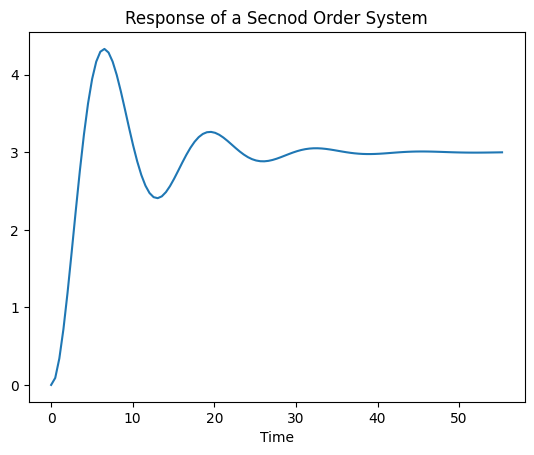

In [31]:
t, y = ctl.step_response(G)
plt.plot(t, y)
plt.xlabel('Time')
plt.title('Response of a Secnod Order System')